In [2]:
import matplotlib
import numpy as np
import pandas as pd

In [3]:
DOWNPAYMENT = 250000
MORTAGE = 6267 # monthly cost for a 3 bedroom townhouse
# source: https://www.zolo.ca/vancouver-real-estate/4353-fleming-street
RENT = 3200 # rent for 3 bedroom in the same area is min 3200
# source: https://vancouver.craigslist.org/search/apa?search_distance=1&postal=V5N+3W4&min_bedrooms=3&min_bathrooms=2&availabilityMode=0&sale_date=all+dates
SALARY = (87914 + 24000) / 12 # net salary calculated using https://simpletax.ca/calculator
PROPERTY_VALUE = 998000

## RENT INCREASE

In [4]:
# yearly rent increases for vancouver
# https://www2.gov.bc.ca/gov/content/housing-tenancy/residential-tenancies/during-a-tenancy/rent-increases
ayri = np.mean([4.0,3.7,2.9,2.5,2.2,3.8,4.3,2.3,3.2,3.7,3.7,4.0,4.0,3.8,4.6])
print("Average yearly rent increase {:.2f}%".format(ayri))

year = []
rent = []
savings = []
mortgage = []

start_rent = RENT
n_years = 25
for i in range(n_years):
    start_rent *= 1.0 + (ayri / 100)
    rent.append(start_rent)
    mortgage.append(MORTAGE)
    savings.append(MORTAGE - start_rent)
start_rent

df = pd.DataFrame({'rent':rent, 'mortgage': mortgage})
ax = df.plot()
ax.set_xlabel('number of years')
ax.set_ylabel('$ amount')
ax.set_title('Monthly cost taking yearly rent increase into account')

Average yearly rent increase 3.51%


Text(0.5, 1.0, 'Monthly cost taking yearly rent increase into account')

Text(0.5, 1.0, 'Savings when renting')

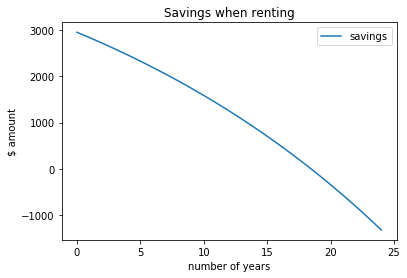

In [5]:
# How much are we saving when we're not paying rent
df = pd.DataFrame({'savings':savings})
ax = df.plot()
ax.set_xlabel('number of years')
ax.set_ylabel('$ amount')
ax.set_title('Savings when renting')

In [6]:
# How much do we get if we invest the money that we saved from renting
value = DOWNPAYMENT
GROWTH = 0.07
for i in range(n_years):
    if savings[i] > 0:
        value += savings[i]
    value *= 1 + GROWTH
    
print('Savings value after 25 years ${:,}'.format(int(value)))

Savings value after 25 years $1,475,307


## PROPERTY TAX

In [7]:
# https://vancouver.ca/home-property-development/residential.aspx
# property tax history for the last 10 years: 2018, 2017, 2016, ... 2008
# NOTE: trending downwards.
property_tax_history = [2.4, 2.5, 3.1, 3.5, 3.67, 3.79, 4.05, 4.17, 4.21, 4.22, 4.3]
mean_property_tax = np.mean(property_tax_history)

PROPERTY_TAX_PERCENTAGE = property_tax_history[0] / 1000
PROPERTY_VALUE * PROPERTY_TAX_PERCENTAGE

2395.2

## INFLATION

Average yearly inflation 1.90%


Text(0.5, 1.0, '% of salary taking inflation and rent increase into account')

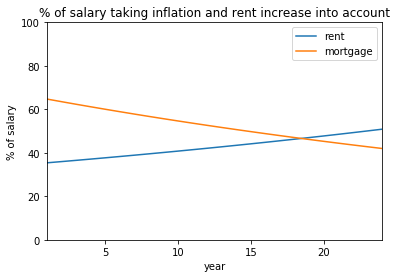

In [60]:
# SOURCE: https://www.inflation.eu/inflation-rates/canada/historic-inflation/cpi-inflation-canada.aspx
# inflation history for the last 20 years
# NOTE: the Vancouver yearly rental increase is much higher then inflation. Almost double, 3.51% vs 1.9%.
# This means that salaries don't catch with the rental increases.
inflation_history = [1.99, 1.87, 1.5, 1.61, 1.47, 1.24, 0.83, 2.35, 1.32, 1.16, 2.38, 1.67, 2.09, 2.13, 2.08, 3.8, 0.72, 3.2, 2.63]
mean_inflation_history = np.mean(inflation_history)
print("Average yearly inflation {:.2f}%".format(mean_inflation_history))

start_salary = SALARY
n_years = 25
start_year = 2019
mortage_salary_percentage = []
rent_salary_percentage = []
year = []
for i in range(n_years):
    start_salary *= 1.0 + (mean_inflation_history / 100)
    mortage_salary_percentage.append((MORTAGE / start_salary) * 100)
    rent_salary_percentage.append((rent[i] / start_salary) * 100)
    start_year += 1
    year.append(start_year)
    
pdf = pd.DataFrame({'rent':rent_salary_percentage, 'mortgage': mortage_salary_percentage})
ax = pdf.plot()
ax.axis([1, 24, 0, 100])
ax.set_xlabel('year')
ax.set_ylabel('% of salary')
ax.set_title('% of salary taking inflation and rent increase into account')

# PROPERTY VALUE
![alt text](files/natl_chartA06_xhi-res_en.png "Title")

In [33]:
# property value history
# source: http://creastats.crea.ca/natl/index.html
# NOTE: here we're only counting from 2005 to 2015 (not taking the big jump into account).

# how does age affect value
# NOTE: there must be an ideal age to sell a house. The numbers below seem very optimistic to me. 
# source: https://www.rew.ca/news/how-a-condo-s-age-affects-its-price-1.2096087
value_increase_per_year = (300 / 200) / 10
end_value = (value_increase_per_year * 25) * PROPERTY_VALUE
depreciation_factor = 0.8; # based on townhouse sale from chart below: 20% less then new
print('Property value after 25 years including depreciation: ${:,}'.format(int(end_value * depreciation_factor)))

Property value after 25 years including depreciation: $2,994,000


![alt text](files/devaluation.png "Title")

In [34]:
# property value calculation based on the following TD report from 2013
# https://www.td.com/document/PDF/economics/special/LongRunRateOfReturnForCanadianHomePrices.pdf
final_value = PROPERTY_VALUE
for i in range(n_years):
    final_value += final_value * 0.035
final_value
print('Property value after 25 years: ${:,}'.format(int(final_value)))

Property value after 25 years: $2,358,518


In [35]:
# NOTE: that the housing market was booming after 2013. If we would use the historical number of 5.3% we get
final_value = PROPERTY_VALUE
for i in range(n_years):
    final_value += final_value * 0.053
final_value
print('Property value after 25 years: ${:,}'.format(int(final_value)))

Property value after 25 years: $3,629,441
